# Основы PyTorch

## Задача №1

- Объявите вещественные тензор `x` размера (3, 4, 5) и тензор `y` размера (2, 6, 5), иницилизируйте их равномерным распределением.
- Создайте их копии на GPU, выведите их сумму и разность
- Затем измените форму тензора `y`, чтобы она совпадала с формой тензора `x`, получите тензор `z`  
- Переместите `z` на CPU

In [ ]:
import torch
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
x =  torch.FloatTensor(3,4,5).uniform_()# ВАШ КОД ЗДЕСЬ
y = torch.FloatTensor(2,6,5).uniform_()# ВАШ КОД ЗДЕСЬ

In [ ]:
y

tensor([[[0.5822, 0.4656, 0.2061, 0.3610, 0.0717],
         [0.3055, 0.6443, 0.5790, 0.6899, 0.2341],
         [0.4126, 0.3299, 0.0020, 0.2033, 0.2622],
         [0.3195, 0.6722, 0.4053, 0.6424, 0.7197],
         [0.2659, 0.1704, 0.3057, 0.8942, 0.2252],
         [0.0293, 0.3572, 0.7583, 0.4744, 0.9140]],

        [[0.1469, 0.2982, 0.5158, 0.4251, 0.2864],
         [0.9476, 0.2881, 0.3834, 0.2989, 0.5152],
         [0.6886, 0.9850, 0.5480, 0.9786, 0.0740],
         [0.4971, 0.5473, 0.5644, 0.7032, 0.9357],
         [0.0543, 0.9848, 0.9751, 0.1016, 0.7247],
         [0.3597, 0.7771, 0.8061, 0.0127, 0.9667]]])

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
x_cuda =x.cuda() # ВАШ КОД ЗДЕСЬ
y_cuda =y.cuda()# ВАШ КОД ЗДЕСЬ

RuntimeError: ignored

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
print("Сумма = ", x_cuda.add(y_cuda.view(3,4,5)))# ВАШ КОД ЗДЕСЬ)
print("Разность = ", x_cuda.sub(y_cuda.view(3,4,5)))# ВАШ КОД ЗДЕСЬ)

Сумма =  tensor([[[0.4067, 1.9195, 1.2519, 1.7664, 0.3458],
         [0.9634, 0.4164, 0.4277, 0.6352, 1.0970],
         [1.2439, 1.0553, 0.5013, 1.2749, 0.8818],
         [1.5637, 0.9101, 0.4286, 1.0012, 1.9568]],

        [[0.6378, 0.9501, 0.5722, 0.5461, 0.9495],
         [0.4488, 1.8349, 0.3598, 0.8510, 1.9013],
         [0.8065, 0.7201, 0.8065, 0.8556, 0.3804],
         [0.7276, 1.4662, 0.5185, 1.3648, 1.3108]],

        [[1.3207, 0.2323, 1.4463, 0.9269, 0.2447],
         [0.5907, 1.7923, 0.8237, 0.6644, 1.2062],
         [1.3590, 1.1892, 0.2358, 0.9405, 0.7695],
         [1.3528, 1.1271, 1.0242, 0.9700, 0.2067]]], device='cuda:0')
Разность =  tensor([[[-0.2927,  0.0042, -0.5146,  0.2062,  0.2194],
         [ 0.6846,  0.3228,  0.0155,  0.3633,  0.7724],
         [ 0.0064, -0.5801,  0.1439, -0.1628,  0.0226],
         [-0.1684, -0.2638,  0.3942,  0.0137,  0.0026]],

        [[-0.0479, -0.4110,  0.1996, -0.1386, -0.0282],
         [ 0.1399, -0.1372, -0.0517,  0.6140, -0.0285],
      

In [ ]:
z = y_cuda.view(3,4,5)# ВАШ КОД ЗДЕСЬ

In [ ]:
z = z.cpu()# ВАШ КОД ЗДЕСЬ

# Задача №2. Функции активации

Мы поняли, что пороговая функция активации сулит нам много проблем. Что если попробовать что-то другое?

Начнем с сигмоиды.

У сигмоиды все в порядке с производной. Можем взять производную функции потерь по весам и спускаться в пространстве параметров в направлении наискорейшего убывания функции потерь. Формула для обновления весов в градиентном спуске:

$$w^{j+1} = w^{j} - \alpha \frac{\partial Loss}{\partial w} (w^{j})$$

Распишем дальше:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} =
\frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)(\sigma(w \cdot x_i))_{w_j}' = \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij}$$

* Градиент функции потерь по вектору весов - это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$:

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{i1} \\
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{i2} \\
           \vdots \\
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{im}
         \end{bmatrix}
\end{align}=\frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

Таким образом, сигмоида отлично подходит. Осталось реализовать в коде.

* Реализуйте сигмоиду и её производную:

In [ ]:
def sigmoid(x): # сигмоида
    return 1/(1+np.exp(-x))# ВАШ КОД ЗДЕСЬ

In [ ]:
def sigmoid_derivative(x): # производная сигмоиды
    return sigmoid(x)*(1-sigmoid(x))# ВАШ КОД ЗДЕСЬ

In [ ]:
def mse_loss(y_pred, y): # функция потерь
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    return 0.5 * np.mean((y_pred - y) ** 2)

In [ ]:
class Perceptron_Sigmoid:
    def __init__(self, w=None, b=0):

        self.w = w
        self.b = b

    def activate(self, x):
        return sigmoid(x)# ВАШ КОД ЗДЕСЬ

    def forward(self, X): # прямой проход
        y_pred = X @ (self.w)+self.b# ВАШ КОД ЗДЕСЬ
        y_pred = self.activate(y_pred)# ВАШ КОД ЗДЕСЬ
        return y_pred.reshape(-1,1)

    def backward(self, X, y, y_pred, learning_rate=0.005): # обратный проход
        n = X.shape[0]
        y = np.array(y).reshape(-1,1)

        dw = 1/n * X.T @ ((y_pred-y)*sigmoid_derivative(y_pred))# ВАШ КОД ЗДЕСЬ
        db = (y_pred-y).mean(axis=0) # ВАШ КОД ЗДЕСЬ

        self.w -= learning_rate*dw
        self.b -= learning_rate*db

    def fit(self, X, y, num_epochs=5000):

        self.w = np.zeros((X.shape[1], 1))  # вектор весов
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов

        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss_values.append(mse_loss(y_pred,y))
            self.backward(X,y,y_pred)

        return np.array(loss_values)

Проверим работоспособность прямого прохода(Получим предсказания для двух обьектов).

In [ ]:
w = np.array([1., 2.,3]).reshape(3, 1) # Создадим вектор весов модели размерности (3, 1) с начальными значениями 1 и 2,3.
w=torch.FloatTensor(w) # Переведем его в Тензор
b = 1.
X = torch.FloatTensor([[1., 2.2, -10.], [3., 4., -1.2]]) # создаем небольшой набор данных (2 обьекта по 3 признака)

perceptron = Perceptron_Sigmoid(w, b)
y_pred = perceptron.forward(X)
print ("y_pred = " + str(y_pred))
print(y_pred.shape)

y_pred = tensor([[5.6318e-11],
        [9.9978e-01]])
torch.Size([2, 1])


In [ ]:
X.T.shape

torch.Size([3, 2])

Проверим работоспособность обратного прохода(Получим обновление Трех весов).

In [ ]:
y = np.array([1, 0]).reshape(2, 1)
y=torch.FloatTensor(y)

perceptron.backward(X, y,y_pred)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = tensor([[0.9992],
        [1.9994],
        [2.9943]])
b = tensor([1.0000])


In [ ]:
rng = np.random.default_rng()
data_0 = np.concatenate([rng.normal((-1, -1), 1, (500, 2)), np.zeros((500, 1))], axis=1) # сэмплируем нули
data_1 = np.concatenate([rng.normal((1, 1), 1, (500, 2)), np.ones((500, 1))], axis=1) # сэмплируем единицы

In [ ]:
def random_mix(X_1, X_2): # перемешиваем
    c = np.concatenate((X_1, X_2))
    np.random.shuffle(c)
    return c

In [ ]:
data = random_mix(data_0, data_1) # получаем наш набор данных

Начальное распределение данных

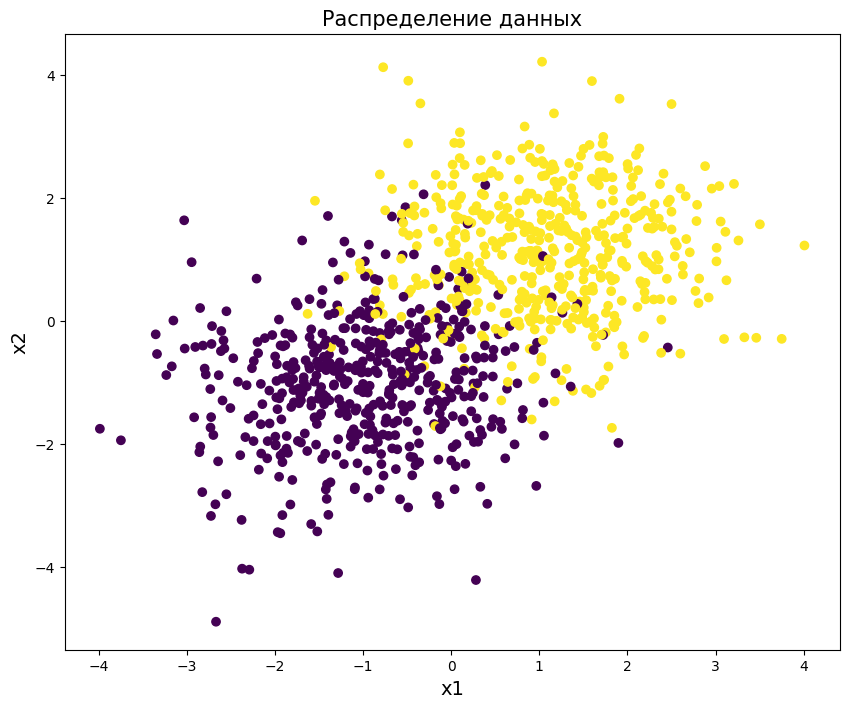

In [ ]:
plt.figure(figsize=(10, 8)) # отрисуем его
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis')# ВАШ КОД ЗДЕСЬ c=perceptron.forward(X).ravel(),
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

In [ ]:
X = data[:, [0, 1]] # обучающая выборка
y = data[:, [2]] # целевая переменная
#X=torch.FloatTensor(X)
#y=torch.FloatTensor(y)

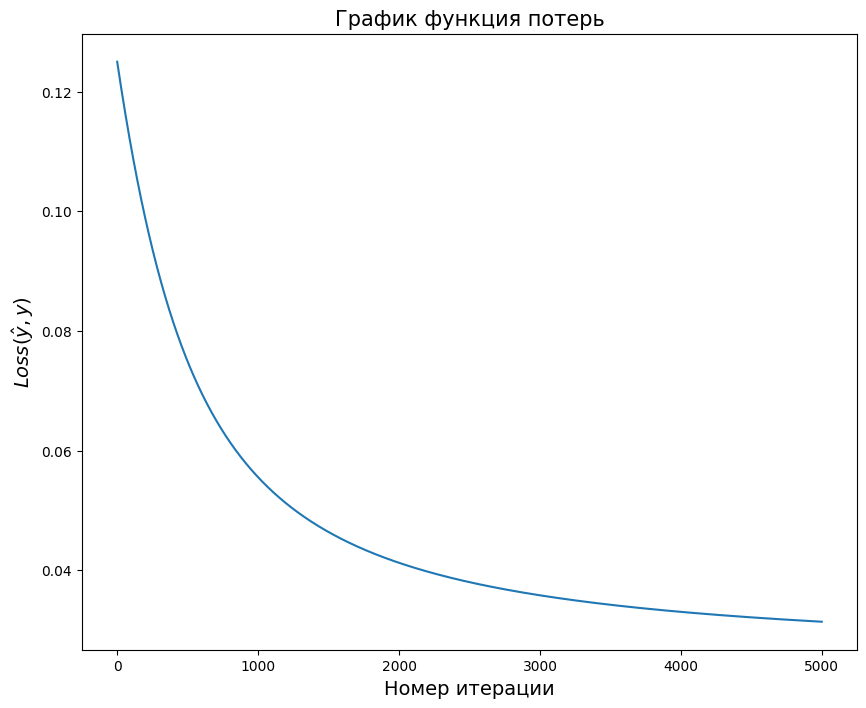

In [ ]:
perceptron = Perceptron_Sigmoid()
losses = perceptron.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Вуаля! Наконец, мы видим, что наш перцептрон обучается.

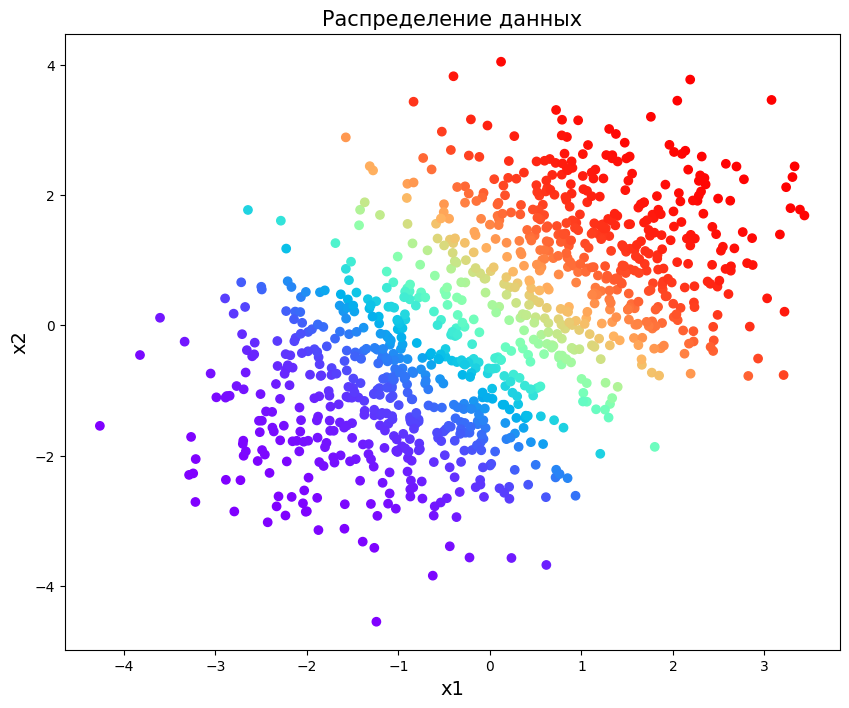

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=perceptron.forward(X).ravel(), cmap='rainbow')
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

Однако данные все равно разделяет линейно.

In [ ]:
print(accuracy_score(perceptron.forward(X).ravel()>0.5, y)) # рассчитаем значение accuracy

0.932


Может быть нам поможет ReLU()? Ведь про сигмоиду мы знаем, что у нее затухают градиенты.

ReLU выглядит очень просто:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Или по-другому:

$$
ReLU(x) = \max(0, x)
$$

В переводе Rectified Linear Unit = "Усечённая линейная функция". Мы по сути просто не даём проходить отрицательным числам.

Производная здесь берётся как производная от кусочно-заданной функции, то есть на участках, где функция гладкая, и в нуле её доопредляют нулём:

\begin{equation*}
ReLU'(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Подставим ReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

Тогда формула для обновления весов при градиентном спуске будет такая:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

Почему в первом случае будет 0? Потому что в $y_i^2$ не входят веса , а мы берём производную именно по весам $w$.

* Реализуйте ReLU и её производную:

#Для начала реализуем РеЛю через PyTorch, а потом уже согласно заданию.

Продублируем вводные условия.

In [ ]:
rng = np.random.default_rng()
data_0 = np.concatenate([rng.normal((-1, -1), 1, (500, 2)), np.zeros((500, 1))], axis=1)
data_1 = np.concatenate([rng.normal((1, 1), 1, (500, 2)), np.ones((500, 1))], axis=1)
def random_mix(X_1, X_2):
    c = np.concatenate((X_1, X_2))
    np.random.shuffle(c)
    return c
data = random_mix(data_0, data_1)
X = data[:, [0, 1]]
y = data[:, [2]]

In [ ]:
class Perceptron_ReLU_0:
    def __init__(self, w=None, b=0):
        self.w = torch.FloatTensor(2, 1).zero_() if w is None else w  #Либо нули, либо то то передано
        self.w=torch.FloatTensor(2,1)
        self.b = torch.FloatTensor([[b]])

    def forward(self, X):
        z = torch.add(torch.mm(X, self.w), self.b)
        a = torch.relu(z)
        return a

    def backward(self, X, y, y_pred, learning_rate=0.005):
        relu_derivative = (y_pred > 0).float()
        dw = 1 / X.shape[0] * torch.mm(X.T, (y_pred - y) * relu_derivative)
        db = 1 / X.shape[0] * torch.sum((y_pred - y) * relu_derivative, dim=0, keepdim=True)
        self.w -= learning_rate * dw
        self.b -= learning_rate * db

    def fit(self, X, y, num_epochs=5000, learning_rate=0.005):
        X = torch.FloatTensor(X)
        y = torch.FloatTensor(y)
        loss_values = []
        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss = torch.mean(torch.square(y - y_pred))
            loss_values.append(loss)
            self.backward(X, y, y_pred)
        return np.array(loss_values)


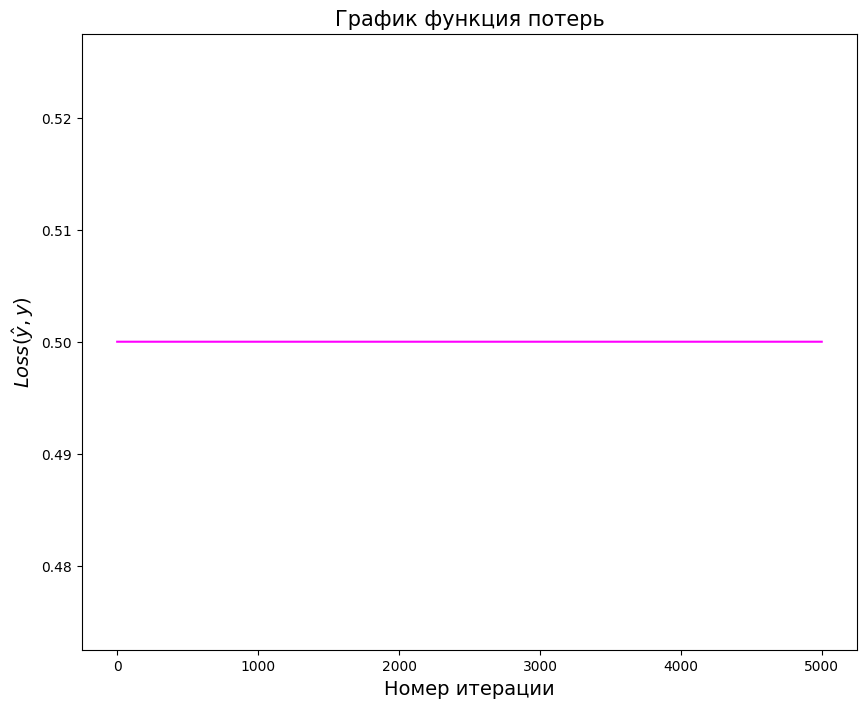

In [ ]:
perceptron = Perceptron_ReLU_0() # При нулях
losses = perceptron.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses,color='magenta')
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

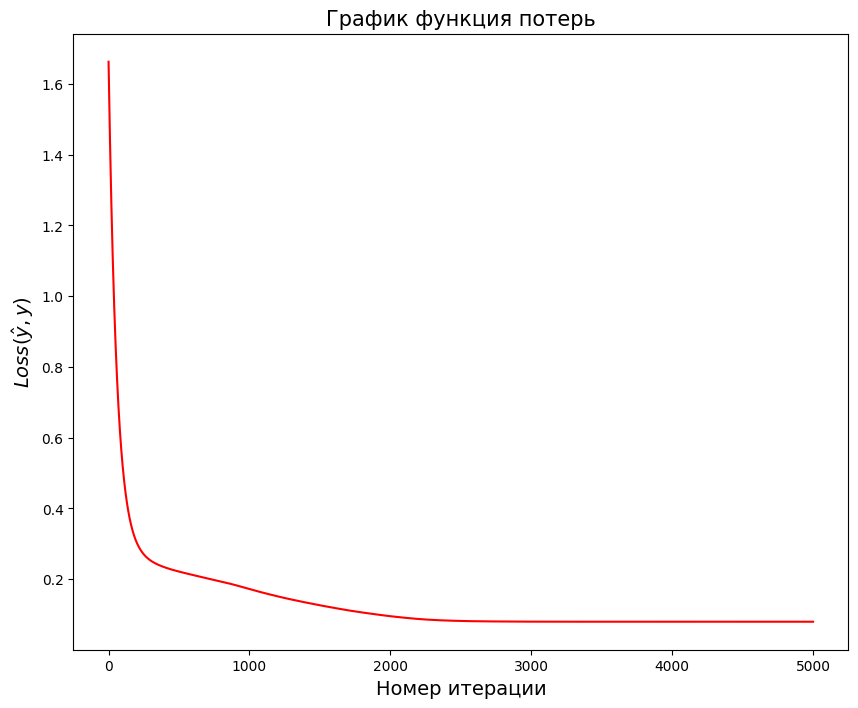

In [ ]:
w = np.random.normal(size=(X.shape[1], 1)) # конвертируем  исходный нампай массив в тензор типа флоат и подаем его на вход
w=torch.from_numpy(w).float()
perceptron = Perceptron_ReLU_0(w)
losses = perceptron.fit(X, y, num_epochs=5000)

plt.figure(figsize=(10, 8))
plt.plot(losses.reshape(-1,),color='red')
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

То же самое силами Numpy

In [ ]:
def relu(x):
    return np.maximum(0,x) # ВАШ КОД ЗДЕСЬ

In [ ]:
def relu_derivative(x):
    return (x>0).astype(int)# ВАШ КОД ЗДЕСЬ

In [ ]:
class Perceptron_ReLU:
    def __init__(self, w=None, b=0):#,zeros=True):

        #self.w = np.zeros((X.shape[1], 1))
        self.w = w
        self.b = b

    def activate(self, x):
        return relu(x)

    def forward(self, X):

        n = X.shape[0]
        y_pred = np.dot(X, self.w) + self.b # ВАШ КОД ЗДЕСЬ
        y_pred = self.activate(y_pred)
        return y_pred.reshape(-1,1)

    def backward(self, X, y, y_pred, learning_rate=0.005):

        n = len(y)
        y = np.array(y).reshape(-1, 1)

        dw = 1/n * (X.T@((y_pred - y)*relu_derivative(y_pred)))# ВАШ КОД ЗДЕСЬ
        db = 1/n * np.sum((y_pred-y))#*relu_derivative(y_pred)# ВАШ КОД ЗДЕСЬ


        self.w -= learning_rate*dw
        self.b -= learning_rate*db

    def fit(self, X, y, num_epochs=5000):

        self.w = np.zeros((X.shape[1], 1))  # вектор весов
        self.b = 0  # смещение (число)
        loss_values = []  # значения функции потерь на различных итерациях обновления весов

        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss_values.append(mse_loss(y_pred,y))
            self.backward(X,y,y_pred)

        return np.array(loss_values)

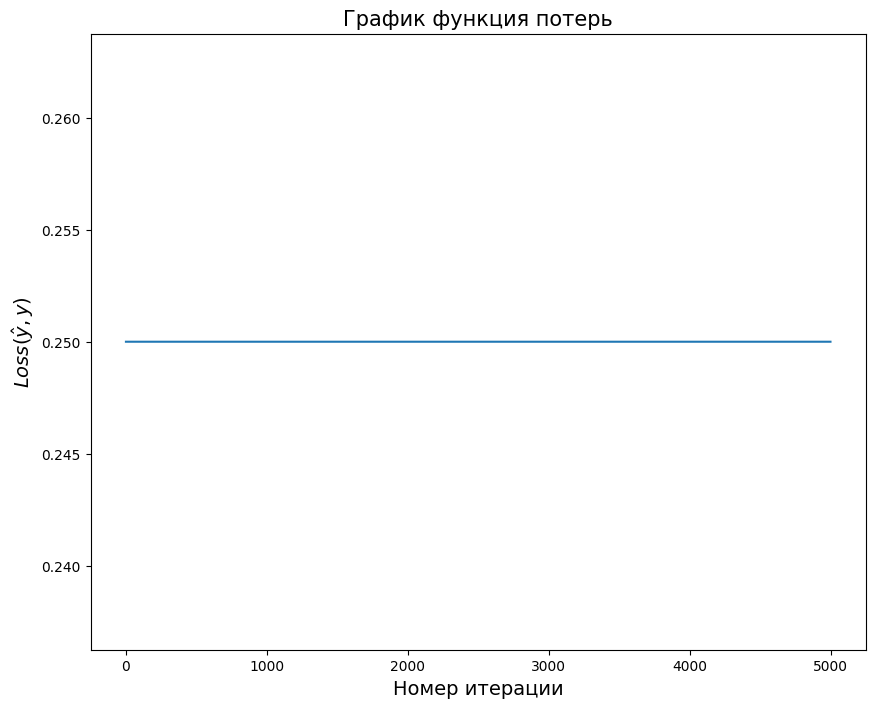

In [ ]:
perceptron = Perceptron_ReLU()
losses = perceptron.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses,,color='green')
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Что мы видим? Что произошло с функцией потерь?

Ничего удивительного, поскольку одна из проблем ReLU() это так называемые "мертвые" нейроны. А наши веса ведь изначально инициализированы нулями! Поэтому обучение и не происходит.

Заинициализируем их случайными числами (не забудьте закомментировать в классе инициализацию нулями):

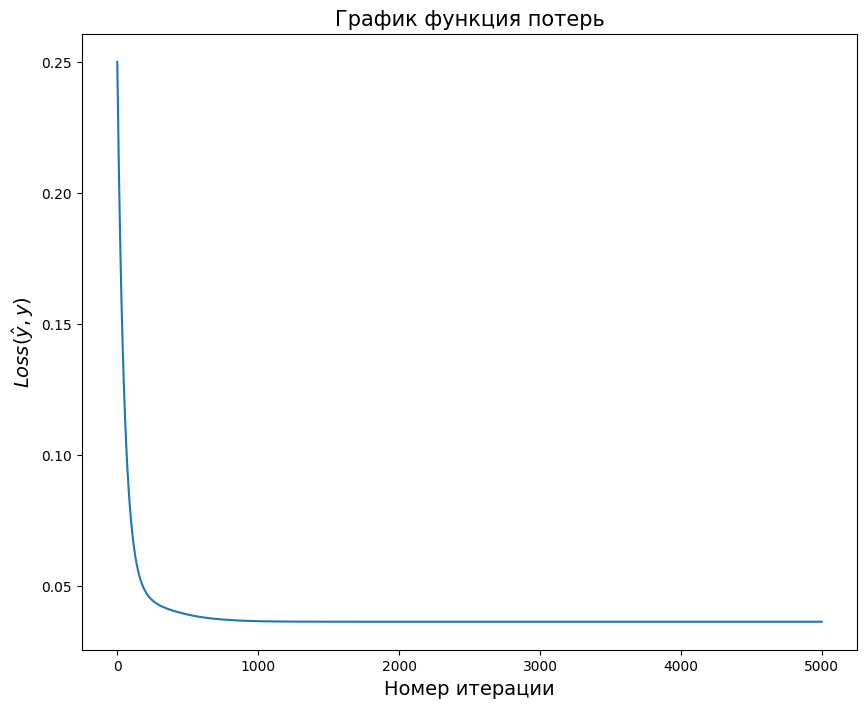

In [ ]:
perceptron = Perceptron_ReLU(w = rng.normal(size = (X.shape[1], 1)))
losses = perceptron.fit(X, y, num_epochs=5000)

plt.figure(figsize=(10, 8))
plt.plot(losses.reshape(-1,),color='green')
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

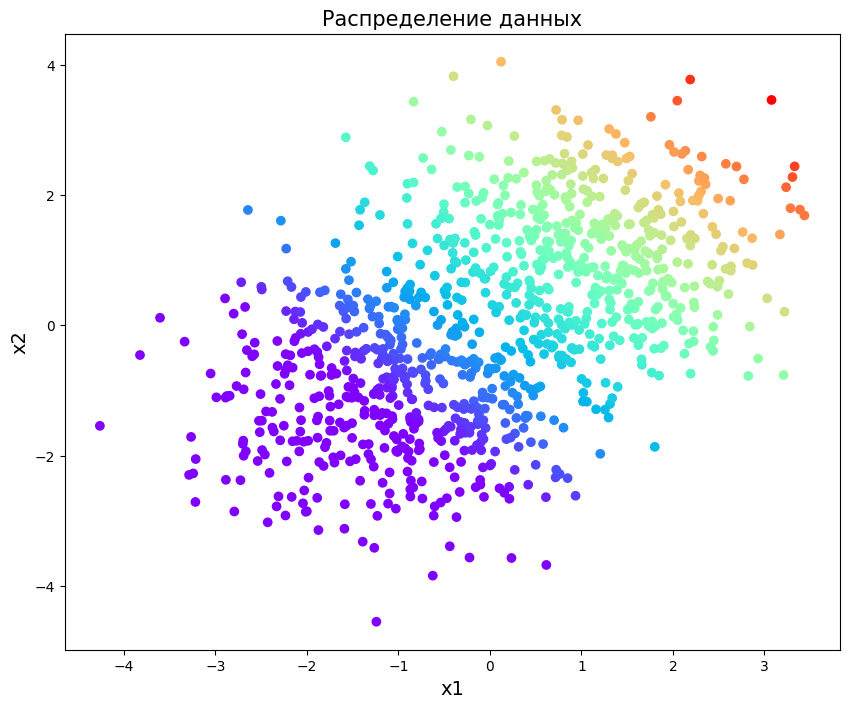

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=perceptron.forward(X).ravel(), cmap='rainbow')
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

Ну вот, другое дело. Однако все равно мы видим линейный решатель.

In [ ]:
print(accuracy_score(np.array(perceptron.forward(X) > 0.5).ravel(), y)) # рассчитаем значение accuracy

0.925


Что ж, можно сделать однозначный вывод: все свои возможности перцептрон исчерпал. Пора переходить к полносвязанным нейронным сетям.